BOX POS [0.08385101 0.00214682 0.03254566]
0.01215390463049257 -0.08575782838168547 60.88511112533433
GOAL POS [ 0.08309543 -0.09184842  0.08837619]
[0.08574786 0.06014798 0.15276312]
[ 0.00988153 -0.10327163  0.15277971]
[-0.09437662  0.04307816  0.15277971]


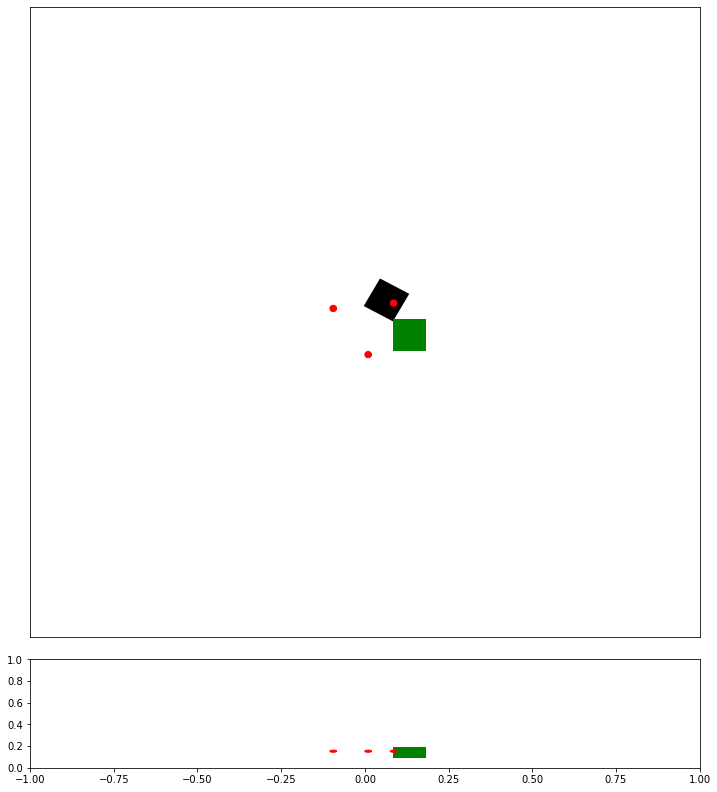

In [3]:
# from  glob import glob
from time import sleep
from baselines.bench import load_results
from matplotlib import pylab as plt
import numpy as np
import argparse
import os
import pandas as pd
from  glob import glob
from matplotlib.gridspec import GridSpec
import math

state_dict = {'robot_position': np.array([-8.55992742e-03,  1.21459918e+00, -2.25559440e+00,  5.46024435e-04,
        1.21814735e+00, -2.26098951e+00,  5.46024435e-04,  1.21814735e+00,
       -2.26098951e+00]), 'robot_velocity': np.array([-2.13998186, 
       -1.78282227,  3.33341258,  0.13650611, -0.89577924,
        1.9846363 ,  0.13650611, -0.89577924,  1.9846363 ]), 
        'robot_tip_positions': np.array([[ 0.08574786,  0.06014798,  0.15276312],
       [ 0.00988153, -0.10327163,  0.15277971],
       [-0.09437662,  0.04307816,  0.15277971]]), 
       'object_position': np.array([0.08385101, 0.00214682, 0.03254566]), 
       'object_orientation': np.array([ 4.70624660e-04, -5.91465649e-04,  
       5.06674167e-01,  8.62137296e-01]), 'goal_object_position': 
       np.array([ 0.08309543, -0.09184842,  0.08837619])}


 #: Orientation as quaternion (x, y, z, w)

def  euler_from_quaternion(x, y, z, w):
        """
        Convert a quaternion into euler angles (roll, pitch, yaw)
        roll is rotation around x in radians (counterclockwise)
        pitch is rotation around y in radians (counterclockwise)
        yaw is rotation around z in radians (counterclockwise)
        """
        t0 = +2.0 * (w * x + y * z)
        t1 = +1.0 - 2.0 * (x * x + y * y)
        roll_x = math.atan2(t0, t1)
     
        t2 = +2.0 * (w * y - z * x)
        t2 = +1.0 if t2 > +1.0 else t2
        t2 = -1.0 if t2 < -1.0 else t2
        pitch_y = math.asin(t2)
     
        t3 = +2.0 * (w * z + x * y)
        t4 = +1.0 - 2.0 * (y * y + z * z)
        yaw_z = math.atan2(t3, t4)
     
        return roll_x, pitch_y, yaw_z # in radians
    
def fig2data ( fig ):
    """
    @brief Convert a Matplotlib figure to a 4D numpy array with RGBA channels and return it
    @param fig a matplotlib figure
    @return a numpy 3D array of RGBA values
    """
    # draw the renderer
    fig.canvas.draw ( )
 
    # Get the RGBA buffer from the figure
    w,h = fig.canvas.get_width_height()
    buf = np.fromstring ( fig.canvas.tostring_argb(), dtype=np.uint8 )
    buf.shape = ( w, h,4 )
 
    # canvas.tostring_argb give pixmap in ARGB mode. Roll the ALPHA channel to have it in RGBA mode
    buf = np.roll ( buf, 3, axis = 2 )
    return buf

def create_image(state_dict):

    fig = plt.figure(clear=True, figsize=(12,14))
    gs=GridSpec(6,7) # 2 rows, 3 columns




    ax1=fig.add_subplot(gs[0:5,:]) # First row, third column
    ax2=fig.add_subplot(gs[5:,:])

    ax1.set_xticks([])
    ax1.set_yticks([])

        
    box_pos = state_dict['object_position']
    print('BOX POS', box_pos)
    obj_or = state_dict['object_orientation']
    roll_x, pitch_y, yaw_z = euler_from_quaternion(obj_or[0], obj_or[1],obj_or[2],obj_or[3])
    print(np.degrees(roll_x), np.degrees(pitch_y),np.degrees(yaw_z))
    rectangle = plt.Rectangle(( box_pos[0], box_pos[1]), 0.1, 0.1, fc='black', angle= np.degrees(yaw_z))
    ax1.add_patch(rectangle)
    
    box_pos = state_dict['goal_object_position']
    print('GOAL POS', box_pos)
    rectangle = plt.Rectangle(( box_pos[0], box_pos[1]), 0.1, 0.1, fc='green')
    ax1.add_patch(rectangle)
    rectangle = plt.Rectangle(( box_pos[0], box_pos[2]), 0.1, 0.1, fc='green')
    ax2.add_patch(rectangle)
    
    
    for ii in range(3):
        pos_tip = state_dict['robot_tip_positions'][ii]
        print(pos_tip)
        ball = plt.Circle((pos_tip[0] ,pos_tip[1]), 0.01, color='r', clip_on=False)
        ax1.add_patch(ball)
        ball = plt.Circle((pos_tip[0] ,pos_tip[2]), 0.01, color='r', clip_on=False)
        ax2.add_patch(ball)
    
    


#     rectangle = plt.Rectangle((X_-2,Y_- 2), 4, 4, fc='blue')
#     ax1.add_patch(rectangle)

#     rectangle = plt.Rectangle((X_ -2,Y_- 2), 4, 4, fc='blue')
#     ax1.add_patch(rectangle)
#     rectangle = plt.Rectangle((28 -4,20- 4), 8, 8, fc='pink')
#     ax1.add_patch(rectangle)
#     rectangle = plt.Rectangle((7.5 -2,20- 2), 4, 4, fc='black')
#     ax1.add_patch(rectangle)
#     rectangle = plt.Rectangle((22 -2,20 -2), 4, 4, fc='black')
#     ax1.add_patch(rectangle)
#     ball = plt.Circle((7.5 ,20), 1.3, color='g', clip_on=False)
#     ax1.add_patch(ball)


    ax1.set_xlim(-1, 1)
    ax1.set_ylim(-1, 1)
    ax2.set_xlim(-1, 1)
    ax2.set_ylim(0, 1)

    return fig




fig = create_image(state_dict)


In [4]:
fig2data(fig).show()

/home/gabbo/miniconda3/envs/animal/lib/python3.6/site-packages/ipykernel_launcher.py:62: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


AttributeError: 'numpy.ndarray' object has no attribute 'show'

In [7]:
from PIL import Image
 
def fig2img ( fig ):
    """
    @brief Convert a Matplotlib figure to a PIL Image in RGBA format and return it
    @param fig a matplotlib figure
    @return a Python Imaging Library ( PIL ) image
    """
    # put the figure pixmap into a numpy array
    buf = fig2data ( fig )
    w, h, d = buf.shape
    return Image.frombytes( "RGBA", ( w ,h ), buf.tostring( ) )

In [13]:
an_image = fig2img(fig)
image_sequence = an_image.getdata()

image_array = np.array(image_sequence)

/home/gabbo/miniconda3/envs/animal/lib/python3.6/site-packages/ipykernel_launcher.py:62: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
/home/gabbo/miniconda3/envs/animal/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  if sys.path[0] == '':


In [12]:
image_sequence

In [2]:
import skimage.measure


In [3]:
image_tensor = skimage.measure.block_reduce(fig2data(fig), (1,1,1), np.max)

/home/gabbo/miniconda3/envs/animal/lib/python3.6/site-packages/ipykernel_launcher.py:62: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


In [4]:
image_tensor.shape

(864, 1008, 4)

/home/gabbo/miniconda3/envs/animal/lib/python3.6/site-packages/ipykernel_launcher.py:62: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


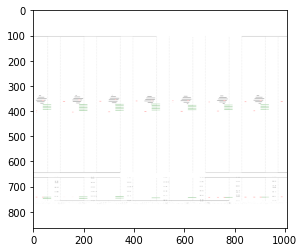

In [5]:
plt.imshow(  np.transpose(fig2data(fig), (0, 1, 2))  )